In [2]:
#import libraries
import pandas as pd
import numpy as np
#graphics libraries
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns

#Models
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew
from scipy.stats import kurtosis
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.impute import SimpleImputer
from datetime import datetime, timedelta
from __future__ import division
import statsmodels.api as sma
#importing preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
#Pipelines
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_score, recall_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE


In [141]:
customers = pd.read_csv('customers.csv')
noncustomers = pd.read_csv('noncustomers.csv')
usage_actions = pd.read_csv('usage_actions.csv')

### Data Dictionary

CLOSEDATE: date when they became a customer

MRR: acronym for "monthly recurring revenue", a monthly payment amount customers make

ALEXA_RANK: a score given by Alexa considering many aspects of a business, such as traffic, performance etc. For example, Google has a score of 1, Facebook has a score of 4 etc.

EMPLOYEE_RANGE: min and max number of employee size of the company

INDUSTRY: industry of the company

id: unique identifier, you may also treat it as if their portal number within which they have taken the actions listed below

WHEN_TIMESTAMP: date when usage activity happened

ACTIONS_CRM_CONTACTS: number of actions users have taken in their portal on Contacts property.

ACTIONS_CRM_COMPANIES: number of actions users have taken in their portal on Companies property.

ACTIONS_CRM_DEALS: number of actions users have taken in their portal on Deals property.

ACTIONS_EMAIL: number of actions users have taken in their portal on Email property.

USERS_CRM_CONTACTS: number of users that have used Contacts property.

USERS_CRM_COMPANIES: number of users that have used Companies property.

USERS_CRM_DEALS: number of users that have used Deals property.

USERS_EMAIL: number of users that have used Email property.

# Question 1 Conversion 
What factors cause non customers to become paying customers?

## Descriptive Statistics

In [505]:
print('Customer Head\n',customers.head())
print('Noncustomer Head\n', noncustomers.head())
print('Usage Actions Head\n', usage_actions.head())

Customer Head
     CLOSEDATE     MRR  ALEXA_RANK EMPLOYEE_RANGE               INDUSTRY   id
0  2019-06-20  290.00      309343    201 to 1000                  Other  199
1  2019-03-22  392.54    16000001      51 to 200                    NaN  147
2  2020-01-08  -61.15       60502  1001 to 10000       HIGHER_EDUCATION  118
3  2019-09-19  400.00     3575321    201 to 1000      CONSUMER_SERVICES  126
4  2019-01-27  209.98      273063       26 to 50  Technology - Software  174
Noncustomer Head
    ALEXA_RANK EMPLOYEE_RANGE              INDUSTRY    id
0   4489573.0       11 to 25                   NaN  4916
1   4027013.0        6 to 10                   NaN  3489
2  16000001.0       26 to 50     COMPUTER_SOFTWARE  2813
3    814822.0  1001 to 10000  HOSPITAL_HEALTH_CARE   727
4  16000001.0       26 to 50                   NaN  2166
Usage Actions Head
             WHEN_TIMESTAMP  ACTIONS_CRM_CONTACTS  ACTIONS_CRM_COMPANIES  \
0  2020-06-01 00:00:00.000                   278                    

In [506]:
print('Customer descriptive statistics\n',customers.describe())
print(customers.shape)
print('Non-Customer descriptive statistics\n', noncustomers.describe())
print(noncustomers.shape)
print('Usage Actions descriptive statistics\n',usage_actions.describe())
usage_actions.shape

Customer descriptive statistics
                MRR    ALEXA_RANK          id
count   200.000000  2.000000e+02  200.000000
mean    320.184250  6.866970e+06  100.500000
std     280.273432  6.515751e+06   57.879185
min    -555.000000  7.826000e+03    1.000000
25%     150.432500  1.093701e+06   50.750000
50%     294.400000  3.675518e+06  100.500000
75%     400.000000  1.600000e+07  150.250000
max    1800.000000  1.600000e+07  200.000000
(200, 6)
Non-Customer descriptive statistics
          ALEXA_RANK           id
count  4.889000e+03  5003.000000
mean   1.139675e+07  2699.047971
std    6.595254e+06  1444.304307
min    1.300000e+01   201.000000
25%    3.955222e+06  1448.500000
50%    1.600000e+07  2699.000000
75%    1.600000e+07  3949.500000
max    1.600000e+07  5200.000000
(5003, 4)
Usage Actions descriptive statistics
        ACTIONS_CRM_CONTACTS  ACTIONS_CRM_COMPANIES  ACTIONS_CRM_DEALS  \
count          25387.000000           25387.000000        25387.00000   
mean              84.6374

(25387, 10)

In [507]:
print('Customer Data Types\n',customers.dtypes)

print('\nNon-Customer Data Types\n', noncustomers.dtypes)

print('\nUsage Actions Data Types\n',usage_actions.dtypes)

Customer Data Types
 CLOSEDATE          object
MRR               float64
ALEXA_RANK          int64
EMPLOYEE_RANGE     object
INDUSTRY           object
id                  int64
dtype: object

Non-Customer Data Types
 ALEXA_RANK        float64
EMPLOYEE_RANGE     object
INDUSTRY           object
id                  int64
dtype: object

Usage Actions Data Types
 WHEN_TIMESTAMP           object
ACTIONS_CRM_CONTACTS      int64
ACTIONS_CRM_COMPANIES     int64
ACTIONS_CRM_DEALS         int64
ACTIONS_EMAIL             int64
USERS_CRM_CONTACTS        int64
USERS_CRM_COMPANIES       int64
USERS_CRM_DEALS           int64
USERS_EMAIL               int64
id                        int64
dtype: object


In [508]:
# Customer data missing for Industry and Employee Range
print("Missing Customer Data\n\n",customers.isna().sum())
print("\nDuplicated Customer Data", customers.duplicated().sum())
# Noncustomerdata missing from for Industry, Employee Range, and Alexa Rank
print("\nMissing Non-Customer Data\n", noncustomers.isna().sum())
print("\nDuplicated Non-Customer Data", noncustomers.duplicated().sum())
# Not missing usage data
print("\nMissing Usage Action Data\n", usage_actions.isna().sum())
print("Duplicated Usage Action Data", usage_actions.duplicated().sum())

Missing Customer Data

 CLOSEDATE           0
MRR                 0
ALEXA_RANK          0
EMPLOYEE_RANGE      2
INDUSTRY          129
id                  0
dtype: int64

Duplicated Customer Data 0

Missing Non-Customer Data
 ALEXA_RANK         114
EMPLOYEE_RANGE     532
INDUSTRY          3725
id                   0
dtype: int64

Duplicated Non-Customer Data 0

Missing Usage Action Data
 WHEN_TIMESTAMP           0
ACTIONS_CRM_CONTACTS     0
ACTIONS_CRM_COMPANIES    0
ACTIONS_CRM_DEALS        0
ACTIONS_EMAIL            0
USERS_CRM_CONTACTS       0
USERS_CRM_COMPANIES      0
USERS_CRM_DEALS          0
USERS_EMAIL              0
id                       0
dtype: int64
Duplicated Usage Action Data 0


## Data Wrangling

In [142]:
# Create new column for concatenation
customers['is_customer']=1
noncustomers['is_customer'] = 0
print(customers.head())
print(noncustomers.head())

    CLOSEDATE     MRR  ALEXA_RANK EMPLOYEE_RANGE               INDUSTRY   id  \
0  2019-06-20  290.00      309343    201 to 1000                  Other  199   
1  2019-03-22  392.54    16000001      51 to 200                    NaN  147   
2  2020-01-08  -61.15       60502  1001 to 10000       HIGHER_EDUCATION  118   
3  2019-09-19  400.00     3575321    201 to 1000      CONSUMER_SERVICES  126   
4  2019-01-27  209.98      273063       26 to 50  Technology - Software  174   

   is_customer  
0            1  
1            1  
2            1  
3            1  
4            1  
   ALEXA_RANK EMPLOYEE_RANGE              INDUSTRY    id  is_customer
0   4489573.0       11 to 25                   NaN  4916            0
1   4027013.0        6 to 10                   NaN  3489            0
2  16000001.0       26 to 50     COMPUTER_SOFTWARE  2813            0
3    814822.0  1001 to 10000  HOSPITAL_HEALTH_CARE   727            0
4  16000001.0       26 to 50                   NaN  2166           

In [143]:
# Combine customer and noncustomer data. Drop revenue and close date
comb_cust = pd.concat([customers.drop(columns =['MRR','CLOSEDATE']),
                       noncustomers],axis = 0)

comb_cust.tail()

,ALEXA_RANK,EMPLOYEE_RANGE,INDUSTRY,id,is_customer
4998,16000001.0,NaN,NaN,637,0
4999,20183.0,1001 to 10000,Non-Profit/Educational Institution,4921,0
5000,16000001.0,6 to 10,NaN,1215,0
5001,NaN,11 to 25,NaN,2693,0
5002,16000001.0,2 to 5,NaN,208,0


In [511]:
#We saw from describe that alexa rank appears to be highly skewed 
#with at least top quartile equal to max value in customer data set
#and top half equal to max value in noncustomer
comb_cust['ALEXA_RANK'].value_counts()

16000001.0    3279
4393.0           4
58796.0          3
8180262.0        3
4388.0           3
              ... 
14550.0          1
10180688.0       1
4500658.0        1
816536.0         1
50.0             1
Name: ALEXA_RANK, Length: 1754, dtype: int64

In [512]:
#Nearly 2/3 of Alexa Rank values are equal to the max value of 16000001.0 indicating it may
#be a placeholder or of little predictive capacity. In general, the higher the rank, the less
#popular your website.
len(comb_cust[comb_cust['ALEXA_RANK']==16000001.0])/len(comb_cust)

0.6302133384585816

In [144]:
#Alexa Rank also has a few nulls, so we will fill in with the median
comb_cust['ALEXA_RANK'] = comb_cust['ALEXA_RANK'].fillna(comb_cust['ALEXA_RANK'].median())

In [514]:
comb_cust['is_customer'].value_counts()

0    5003
1     200
Name: is_customer, dtype: int64

In [515]:
#3/4 of Industry designations are also null. We will drop.
print(comb_cust['INDUSTRY'].isna().sum()/len(comb_cust))
comb_cust.drop('INDUSTRY', axis=1, inplace=True)

0.7407265039400346


In [517]:
print(comb_cust.dtypes)
comb_cust.isna().sum()

ALEXA_RANK        float64
EMPLOYEE_RANGE     object
id                  int64
is_customer         int64
dtype: object


ALEXA_RANK          0
EMPLOYEE_RANGE    534
id                  0
is_customer         0
dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

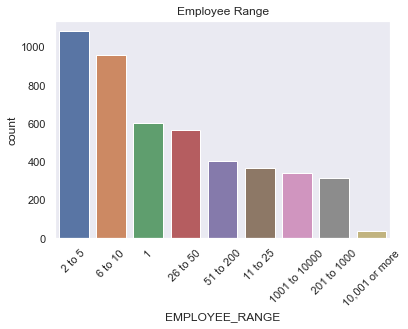

In [518]:
# Just under 10% of employee range data is missing, what does the
# data look like?
sns.set(style = "dark", color_codes=True)
pal = sns.color_palette("Reds_r",len(comb_cust['EMPLOYEE_RANGE']))
sns.countplot(x='EMPLOYEE_RANGE', 
              data=comb_cust,
              order = comb_cust['EMPLOYEE_RANGE']
              .value_counts().index).set(title='Employee Range')
plt.xticks(rotation=45)
#comb_cust['EMPLOYEE_RANGE'].value_counts().plot(kind='bar')

In [145]:
# We convert to dummy variables to measure employee size
emp = pd.get_dummies(comb_cust['EMPLOYEE_RANGE'])
cust_emp = pd.concat([comb_cust,emp], axis =1)
cust_emp.drop('EMPLOYEE_RANGE', axis=1, inplace=True)
cust_emp.tail()

,ALEXA_RANK,INDUSTRY,id,is_customer,1,"10,001 or more",1001 to 10000,11 to 25,2 to 5,201 to 1000,26 to 50,51 to 200,6 to 10
4998,16000001.0,NaN,637,0,0,0,0,0,0,0,0,0,0
4999,20183.0,Non-Profit/Educational Institution,4921,0,0,0,1,0,0,0,0,0,0
5000,16000001.0,NaN,1215,0,0,0,0,0,0,0,0,0,1
5001,16000001.0,NaN,2693,0,0,0,0,1,0,0,0,0,0
5002,16000001.0,NaN,208,0,0,0,0,0,1,0,0,0,0


In [147]:
# Merge combined customer data sets with customer actions
# Remember non-customers can perform actions
# Use a left join with usage_actions the left table, because we are 
# analyzing customer actions.
cust_actions = pd.merge(usage_actions, cust_emp, how = 'left', on = 'id')
cust_actions.tail()

,WHEN_TIMESTAMP,ACTIONS_CRM_CONTACTS,ACTIONS_CRM_COMPANIES,ACTIONS_CRM_DEALS,ACTIONS_EMAIL,USERS_CRM_CONTACTS,USERS_CRM_COMPANIES,USERS_CRM_DEALS,USERS_EMAIL,id,...,is_customer,1,"10,001 or more",1001 to 10000,11 to 25,2 to 5,201 to 1000,26 to 50,51 to 200,6 to 10
25385,2019-12-16 00:00:00.000,2,2,0,0,1,1,0,0,406,...,0,0,0,0,0,0,0,0,1,0
25386,2019-08-05 00:00:00.000,0,0,0,0,0,0,0,0,1885,...,0,0,0,0,0,0,0,0,0,1
25387,2020-02-24 00:00:00.000,84,286,151,0,8,8,9,0,51,...,1,0,0,0,1,0,0,0,0,0
25388,2020-02-03 00:00:00.000,85,0,24,0,1,0,1,0,2360,...,0,0,0,0,0,1,0,0,0,0
25389,2020-06-08 00:00:00.000,0,0,0,0,0,0,0,0,4565,...,0,0,0,0,0,0,0,0,0,0


In [148]:
cust_actions['date'] = pd.to_datetime(cust_actions['WHEN_TIMESTAMP'], format = '%Y-%m-%d')
cust_actions.drop(['WHEN_TIMESTAMP','INDUSTRY'], axis=1, inplace=True)

In [522]:
cust_actions.head()

,ACTIONS_CRM_CONTACTS,ACTIONS_CRM_COMPANIES,ACTIONS_CRM_DEALS,ACTIONS_EMAIL,USERS_CRM_CONTACTS,USERS_CRM_COMPANIES,USERS_CRM_DEALS,USERS_EMAIL,id,ALEXA_RANK,...,1,"10,001 or more",1001 to 10000,11 to 25,2 to 5,201 to 1000,26 to 50,51 to 200,6 to 10,date
0,278,0,34,0,2,0,2,0,616,16000001.0,...,0,0,0,0,1,0,0,0,0,2020-06-01
1,0,0,0,0,0,0,0,0,3059,16000001.0,...,0,0,0,0,0,0,0,0,1,2020-04-20
2,210,1,17,11,3,1,4,1,2813,16000001.0,...,0,0,0,0,0,0,1,0,0,2019-04-29
3,1,1,1,0,1,1,1,0,5076,16000001.0,...,0,0,0,0,1,0,0,0,0,2020-02-24
4,9,9,7,0,1,1,1,0,3983,16000001.0,...,0,0,0,0,0,0,0,0,1,2020-02-17


In [523]:
cust_actions['is_customer'].value_counts()

0    16926
1     8464
Name: is_customer, dtype: int64

In [149]:
#No Null Values
cust_actions.isna().sum()

ACTIONS_CRM_CONTACTS     0
ACTIONS_CRM_COMPANIES    0
ACTIONS_CRM_DEALS        0
ACTIONS_EMAIL            0
USERS_CRM_CONTACTS       0
USERS_CRM_COMPANIES      0
USERS_CRM_DEALS          0
USERS_EMAIL              0
id                       0
ALEXA_RANK               0
is_customer              0
1                        0
10,001 or more           0
1001 to 10000            0
11 to 25                 0
2 to 5                   0
201 to 1000              0
26 to 50                 0
51 to 200                0
6 to 10                  0
date                     0
dtype: int64

In [525]:
cust_actions.dtypes

ACTIONS_CRM_CONTACTS              int64
ACTIONS_CRM_COMPANIES             int64
ACTIONS_CRM_DEALS                 int64
ACTIONS_EMAIL                     int64
USERS_CRM_CONTACTS                int64
USERS_CRM_COMPANIES               int64
USERS_CRM_DEALS                   int64
USERS_EMAIL                       int64
id                                int64
ALEXA_RANK                      float64
is_customer                       int64
1                                 uint8
10,001 or more                    uint8
1001 to 10000                     uint8
11 to 25                          uint8
2 to 5                            uint8
201 to 1000                       uint8
26 to 50                          uint8
51 to 200                         uint8
6 to 10                           uint8
date                     datetime64[ns]
dtype: object

In [526]:
cust_id_cust = cust_actions[['id','is_customer']]
cust_id_cust.drop_duplicates(inplace = True)

<ipython-input-526-cd894066868d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_id_cust.drop_duplicates(inplace = True)


In [527]:
cust_id_cust['is_customer'].value_counts()

0    3370
1     199
Name: is_customer, dtype: int64

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

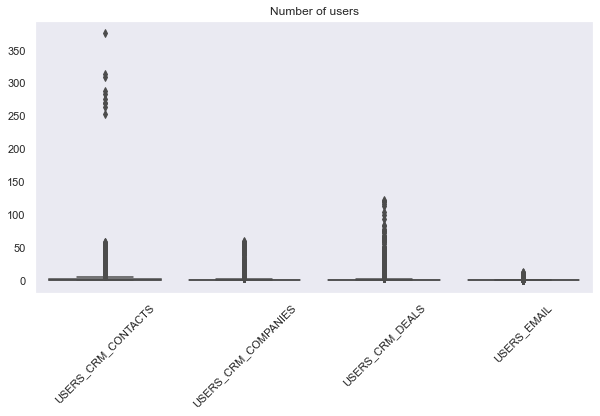

In [528]:
# The next two boxplots show the number of users and the number of 
# actions are HIGHLY skewed. We should consider this when choosing our model
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data = cust_actions[['USERS_CRM_CONTACTS','USERS_CRM_COMPANIES',
                                  'USERS_CRM_DEALS','USERS_EMAIL']], orient="v")
plt.title('Number of users')
plt.xticks(rotation=45)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

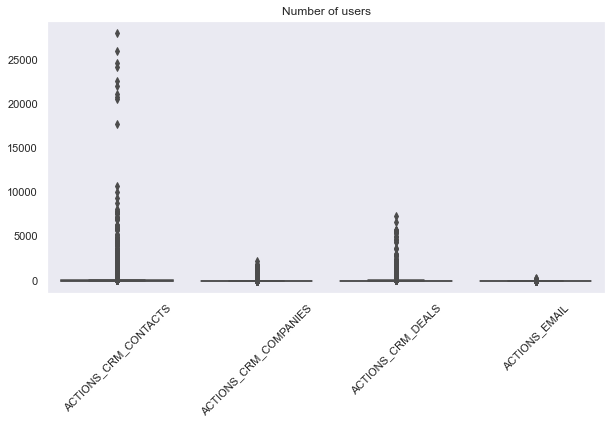

In [530]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data = cust_actions[['ACTIONS_CRM_CONTACTS','ACTIONS_CRM_COMPANIES',
                                  'ACTIONS_CRM_DEALS','ACTIONS_EMAIL']], orient="v")
plt.title('Number of users')
plt.xticks(rotation=45)

In [529]:
# Outlier detection - very few companies have more than 100 users in the
# system
cust_actions.query('USERS_CRM_CONTACTS> 100').sort_values('date')

,ACTIONS_CRM_CONTACTS,ACTIONS_CRM_COMPANIES,ACTIONS_CRM_DEALS,ACTIONS_EMAIL,USERS_CRM_CONTACTS,USERS_CRM_COMPANIES,USERS_CRM_DEALS,USERS_EMAIL,id,ALEXA_RANK,...,1,"10,001 or more",1001 to 10000,11 to 25,2 to 5,201 to 1000,26 to 50,51 to 200,6 to 10,date
17476,20740,13,23,5,376,9,14,1,119,1740005.0,...,0,0,0,0,0,1,0,0,0,2020-05-04
19358,27936,4,12,4,314,3,10,1,119,1740005.0,...,0,0,0,0,0,1,0,0,0,2020-05-11
14728,24126,1,61,3,309,1,9,1,119,1740005.0,...,0,0,0,0,0,1,0,0,0,2020-05-18
20874,20539,0,4,0,288,0,3,0,119,1740005.0,...,0,0,0,0,0,1,0,0,0,2020-05-25
4226,21066,0,6,4,283,0,3,2,119,1740005.0,...,0,0,0,0,0,1,0,0,0,2020-06-15
15929,17718,0,3,1,270,0,2,1,119,1740005.0,...,0,0,0,0,0,1,0,0,0,2020-06-29
661,21982,3,35,0,276,2,6,0,119,1740005.0,...,0,0,0,0,0,1,0,0,0,2020-07-06
8117,24551,0,16,0,264,0,5,0,119,1740005.0,...,0,0,0,0,0,1,0,0,0,2020-07-13
22232,25975,1,4,3,270,1,2,1,119,1740005.0,...,0,0,0,0,0,1,0,0,0,2020-07-20
20124,22557,1,11,0,253,1,2,0,119,1740005.0,...,0,0,0,0,0,1,0,0,0,2020-07-27


In [531]:
# Outlier detection. Very few cos perform greater than 10k actions
cust_actions.query('ACTIONS_CRM_CONTACTS> 10000').sort_values('date')

,ACTIONS_CRM_CONTACTS,ACTIONS_CRM_COMPANIES,ACTIONS_CRM_DEALS,ACTIONS_EMAIL,USERS_CRM_CONTACTS,USERS_CRM_COMPANIES,USERS_CRM_DEALS,USERS_EMAIL,id,ALEXA_RANK,...,1,"10,001 or more",1001 to 10000,11 to 25,2 to 5,201 to 1000,26 to 50,51 to 200,6 to 10,date
16402,10037,0,10,2,12,0,6,1,39,2392953.0,...,0,0,0,0,0,1,0,0,0,2019-01-07
14620,10659,0,16,9,11,0,3,2,39,2392953.0,...,0,0,0,0,0,1,0,0,0,2019-01-14
17476,20740,13,23,5,376,9,14,1,119,1740005.0,...,0,0,0,0,0,1,0,0,0,2020-05-04
19358,27936,4,12,4,314,3,10,1,119,1740005.0,...,0,0,0,0,0,1,0,0,0,2020-05-11
14728,24126,1,61,3,309,1,9,1,119,1740005.0,...,0,0,0,0,0,1,0,0,0,2020-05-18
20874,20539,0,4,0,288,0,3,0,119,1740005.0,...,0,0,0,0,0,1,0,0,0,2020-05-25
4226,21066,0,6,4,283,0,3,2,119,1740005.0,...,0,0,0,0,0,1,0,0,0,2020-06-15
15929,17718,0,3,1,270,0,2,1,119,1740005.0,...,0,0,0,0,0,1,0,0,0,2020-06-29
661,21982,3,35,0,276,2,6,0,119,1740005.0,...,0,0,0,0,0,1,0,0,0,2020-07-06
8117,24551,0,16,0,264,0,5,0,119,1740005.0,...,0,0,0,0,0,1,0,0,0,2020-07-13


In [154]:
sns.set_style('dark')

C:\Users\matth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 0, 'Date')

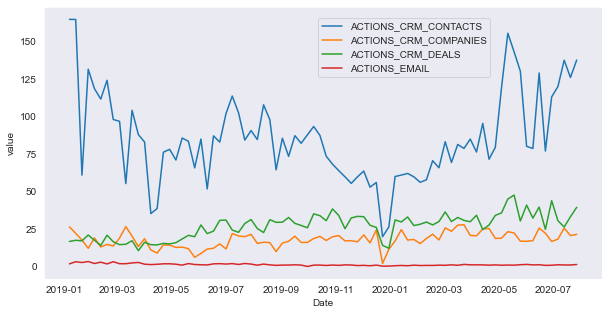

In [156]:

# What do the actions look like over time?
fig, ax = plt.subplots(figsize=(10, 5))
lp = sns.lineplot('date', 'value', ci=None, 
             hue='actions', data=pd.melt(cust_actions, id_vars =['date'], 
                                           var_name = 'actions',
                                           value_vars =['ACTIONS_CRM_CONTACTS',
                                                        'ACTIONS_CRM_COMPANIES',
                                                        'ACTIONS_CRM_DEALS',
                                                        'ACTIONS_EMAIL']))
lp.legend(bbox_to_anchor=(.8, .85), loc='right', borderaxespad=0)
plt.xlabel('Date')

C:\Users\matth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Date')

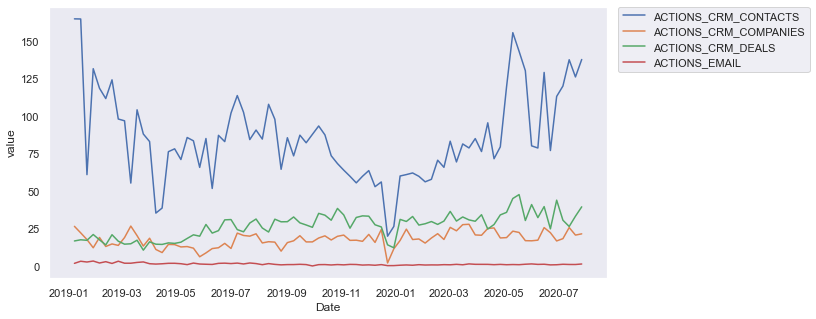

In [532]:
# What do the actions look like over time?
fig, ax = plt.subplots(figsize=(10, 5))
lp = sns.lineplot('date', 'value', ci=None, 
             hue='actions', data=pd.melt(cust_actions, id_vars =['date'], 
                                           var_name = 'actions',
                                           value_vars =['ACTIONS_CRM_CONTACTS',
                                                        'ACTIONS_CRM_COMPANIES',
                                                        'ACTIONS_CRM_DEALS',
                                                        'ACTIONS_EMAIL']))
lp.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Date')


C:\Users\matth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Date')

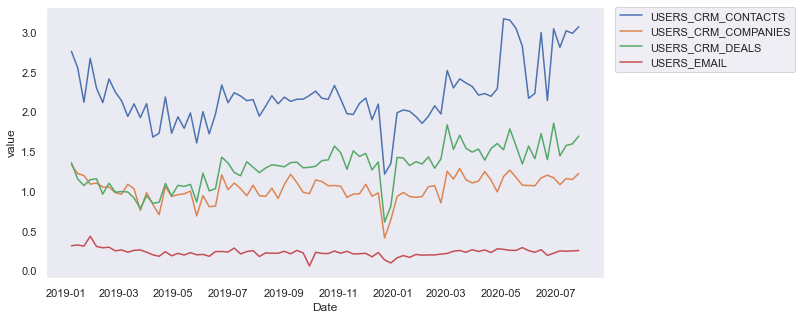

In [533]:
fig, ax = plt.subplots(figsize=(10, 5))
lp = sns.lineplot('date', 'value', ci=None, 
             hue='actions', data=pd.melt(cust_actions, id_vars =['date'], 
                                           var_name = 'actions',
                                           value_vars =['USERS_CRM_CONTACTS',
                                                        'USERS_CRM_COMPANIES',
                                                        'USERS_CRM_DEALS',
                                                        'USERS_EMAIL']))
lp.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Date')

### Feature Engineering
It is unclear if high values in actions and users are outliers due to differing user counts. More users should equal more actions. We will average daily actions per user to help normalize the dataset.

In [534]:
cust_actions['crm_contacts_apu'] = (cust_actions['ACTIONS_CRM_CONTACTS']/cust_actions['USERS_CRM_CONTACTS']).fillna(0)
cust_actions['crm_companies_apu'] = (cust_actions['ACTIONS_CRM_COMPANIES']/cust_actions['USERS_CRM_COMPANIES']).fillna(0)
cust_actions['crm_deals_apu'] = (cust_actions['ACTIONS_CRM_DEALS']/cust_actions['USERS_CRM_DEALS']).fillna(0)
cust_actions['emails_apu'] = (cust_actions['ACTIONS_EMAIL']/cust_actions['USERS_EMAIL']).fillna(0)
cust_actions[['crm_contacts_apu','crm_companies_apu','crm_deals_apu','emails_apu']].head()

,crm_contacts_apu,crm_companies_apu,crm_deals_apu,emails_apu
0,139.0,0.0,17.00,0.0
1,0.0,0.0,0.00,0.0
2,70.0,1.0,4.25,11.0
3,1.0,1.0,1.00,0.0
4,9.0,9.0,7.00,0.0


Text(0.5, 0, 'Date')

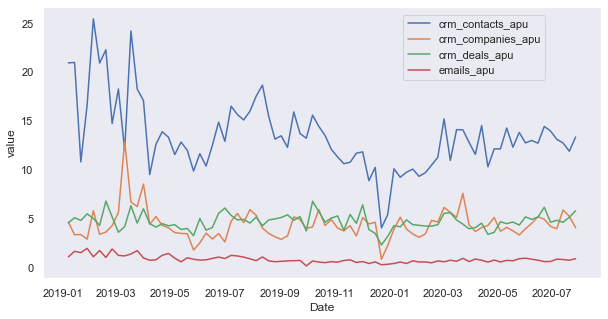

In [1156]:
# What do the actions look like over time?
fig, ax = plt.subplots(figsize=(10, 5))
lp = sns.lineplot('date', 'value', ci=None, 
             hue='actions', data=pd.melt(cust_actions, id_vars =['date'], 
                                           var_name = 'actions',
                                           value_vars =['crm_contacts_apu','crm_companies_apu',
                                                        'crm_deals_apu','emails_apu']))
lp.legend(bbox_to_anchor=(.9, .85), loc='right', borderaxespad=0)
plt.xlabel('Date')


In [535]:
cust_actions.head()

,ACTIONS_CRM_CONTACTS,ACTIONS_CRM_COMPANIES,ACTIONS_CRM_DEALS,ACTIONS_EMAIL,USERS_CRM_CONTACTS,USERS_CRM_COMPANIES,USERS_CRM_DEALS,USERS_EMAIL,id,ALEXA_RANK,...,2 to 5,201 to 1000,26 to 50,51 to 200,6 to 10,date,crm_contacts_apu,crm_companies_apu,crm_deals_apu,emails_apu
0,278,0,34,0,2,0,2,0,616,16000001.0,...,1,0,0,0,0,2020-06-01,139.0,0.0,17.00,0.0
1,0,0,0,0,0,0,0,0,3059,16000001.0,...,0,0,0,0,1,2020-04-20,0.0,0.0,0.00,0.0
2,210,1,17,11,3,1,4,1,2813,16000001.0,...,0,0,1,0,0,2019-04-29,70.0,1.0,4.25,11.0
3,1,1,1,0,1,1,1,0,5076,16000001.0,...,1,0,0,0,0,2020-02-24,1.0,1.0,1.00,0.0
4,9,9,7,0,1,1,1,0,3983,16000001.0,...,0,0,0,0,1,2020-02-17,9.0,9.0,7.00,0.0


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

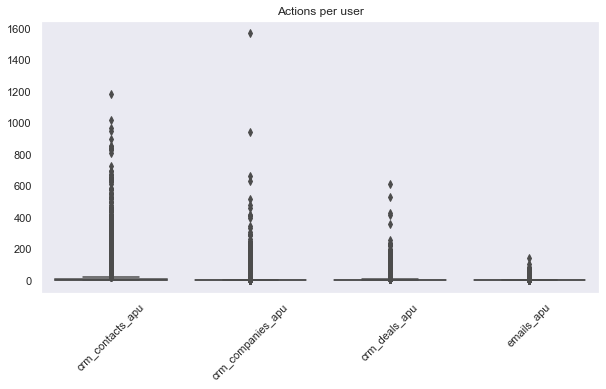

In [536]:
# New features are still highly skewed. 
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data = cust_actions[['crm_contacts_apu','crm_companies_apu',
                                  'crm_deals_apu','emails_apu']], orient="v")
plt.title('Actions per user')
plt.xticks(rotation=45)

In [537]:
cust_actions[['ACTIONS_CRM_CONTACTS','USERS_CRM_CONTACTS', 'crm_contacts_apu','id']].nlargest(10, 'crm_contacts_apu')

,ACTIONS_CRM_CONTACTS,USERS_CRM_CONTACTS,crm_contacts_apu,id
19621,1183,1,1183.000000,5029
4256,1022,1,1022.000000,5029
14620,10659,11,969.000000,39
19916,947,1,947.000000,5029
20708,902,1,902.000000,5029
5138,856,1,856.000000,5029
4888,9366,11,851.454545,39
7789,1680,2,840.000000,3782
16402,10037,12,836.416667,39
2750,832,1,832.000000,2683


In [538]:
# Outlier detection. There are a small number of improbable values.
# How do we decide what to cut?
len(cust_actions[cust_actions['crm_contacts_apu'] > 500])/len(cust_actions)

0.0015754233950374162

It seems unlikely 1 person could perform 1183 actions in 1 day. Let's use an isolation forest to get some statistical rigor around this question. Isolation forests work well with high-dimensionality data. They identify anomalies or outliers rather than profiling normal data points. The contamination value, which is really unknown, determines what gets pruned. We'll reduce to a 2-dimensionality set using PCA for visualization.

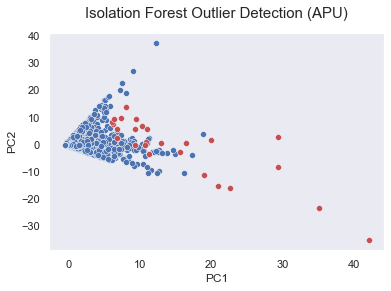

In [539]:
X = cust_actions[['crm_contacts_apu','crm_companies_apu',
                                  'crm_deals_apu','emails_apu']].to_numpy()

iforest = IsolationForest(n_estimators=100, max_samples='auto', 
                          contamination=0.001, max_features=1.0, 
                          bootstrap=False, n_jobs=-1, random_state=1)

# Returns 1 of inliers, -1 for outliers
pred = iforest.fit_predict(X)

# Extract outliers
outlier_index = np.where(pred==-1)
outlier_values = X[outlier_index]

# Feature scaling 
sc=StandardScaler()
X_scaled = sc.fit_transform(X)
outlier_values_scaled = sc.transform(outlier_values)

# Apply PCA to reduce the dimensionality
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
outlier_values_pca = pca.transform(outlier_values_scaled)

# Plot the data
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1])
sns.scatterplot(x=outlier_values_pca[:,0], 
                y=outlier_values_pca[:,1], color='r')
plt.title("Isolation Forest Outlier Detection (APU)", 
           fontsize=15, pad=15)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [540]:
# outlier values in red will be cut
iforest.fit(cust_actions[['crm_contacts_apu','crm_companies_apu',
                                  'crm_deals_apu','emails_apu']])

#print(iforest.get_params())

IsolationForest(contamination=0.001, n_jobs=-1, random_state=1)

In [541]:
# observations marked with anomaly value -1 are outliers
cust_actions['scores'] = iforest.decision_function(cust_actions[['crm_contacts_apu','crm_companies_apu',
                                  'crm_deals_apu','emails_apu']])

cust_actions['anomaly_score'] = iforest.predict(cust_actions[['crm_contacts_apu','crm_companies_apu',
                                  'crm_deals_apu','emails_apu']])

cust_actions[['crm_contacts_apu','crm_companies_apu',
                                  'crm_deals_apu','emails_apu','scores','anomaly_score']][cust_actions['anomaly_score']==-1]

,crm_contacts_apu,crm_companies_apu,crm_deals_apu,emails_apu,scores,anomaly_score
774,165.909091,127.900000,1.250000,48.0,-0.031599,-1
1004,172.000000,204.000000,11.500000,40.0,-0.043635,-1
1273,552.000000,41.000000,610.000000,0.0,-0.028888,-1
2384,189.333333,29.000000,231.000000,0.0,-0.004870,-1
2750,832.000000,946.000000,0.000000,0.0,-0.014235,-1
3910,134.900000,9.000000,57.250000,29.5,-0.003987,-1
4517,138.384615,0.000000,104.800000,20.0,-0.014275,-1
5397,402.000000,633.500000,0.000000,0.0,-0.005255,-1
6576,283.500000,1570.000000,0.000000,0.0,-0.000542,-1
9054,481.833333,0.000000,3.500000,27.0,-0.012436,-1


In [542]:
# .1% of actions seem to be outliers
len(cust_actions[cust_actions['anomaly_score'] == -1])/len(cust_actions)

0.0010240252067743206

In [543]:
print(cust_actions.shape)
cust_actions_in = cust_actions[cust_actions['anomaly_score'] == 1]

# Print the new dataframe
print(cust_actions_in.dtypes)
print(cust_actions_in.shape)
 

(25390, 27)
ACTIONS_CRM_CONTACTS              int64
ACTIONS_CRM_COMPANIES             int64
ACTIONS_CRM_DEALS                 int64
ACTIONS_EMAIL                     int64
USERS_CRM_CONTACTS                int64
USERS_CRM_COMPANIES               int64
USERS_CRM_DEALS                   int64
USERS_EMAIL                       int64
id                                int64
ALEXA_RANK                      float64
is_customer                       int64
1                                 uint8
10,001 or more                    uint8
1001 to 10000                     uint8
11 to 25                          uint8
2 to 5                            uint8
201 to 1000                       uint8
26 to 50                          uint8
51 to 200                         uint8
6 to 10                           uint8
date                     datetime64[ns]
crm_contacts_apu                float64
crm_companies_apu               float64
crm_deals_apu                   float64
emails_apu                  

In [545]:

cust_actions_clean = cust_actions_in.drop(
    ['scores','anomaly_score','id'], axis=1)
cust_actions_clean.dtypes

ACTIONS_CRM_CONTACTS              int64
ACTIONS_CRM_COMPANIES             int64
ACTIONS_CRM_DEALS                 int64
ACTIONS_EMAIL                     int64
USERS_CRM_CONTACTS                int64
USERS_CRM_COMPANIES               int64
USERS_CRM_DEALS                   int64
USERS_EMAIL                       int64
ALEXA_RANK                      float64
is_customer                       int64
1                                 uint8
10,001 or more                    uint8
1001 to 10000                     uint8
11 to 25                          uint8
2 to 5                            uint8
201 to 1000                       uint8
26 to 50                          uint8
51 to 200                         uint8
6 to 10                           uint8
date                     datetime64[ns]
crm_contacts_apu                float64
crm_companies_apu               float64
crm_deals_apu                   float64
emails_apu                      float64
dtype: object

### Dimensionality Reduction
We now face a dataset with a high number of dimensions. We will determine which features are most relevant to the target variable

In [546]:
# name of the label (can be seen in the dataframe)
label = 'is_customer'

In [547]:
# Define a function to measure 'merit' or whether or not feature should
# be included
from scipy.stats import pointbiserialr
from math import sqrt

def getMerit(subset, label):
    k = len(subset)

    # average feature-class correlation
    rcf_all = []
    for feature in subset:
        coeff = pointbiserialr( cust_actions_clean[label], cust_actions_clean[feature] )
        rcf_all.append( abs( coeff.correlation ) )
    rcf = np.mean( rcf_all )

    # average feature-feature correlation
    corr = cust_actions_clean[subset].corr()
    corr.values[np.tril_indices_from(corr.values)] = np.nan
    corr = abs(corr)
    rff = corr.unstack().mean()

    return (k * rcf) / sqrt(k + k * (k-1) * rff)

In [569]:
subset = ['ACTIONS_CRM_CONTACTS',
                           'ACTIONS_CRM_COMPANIES','ACTIONS_CRM_DEALS',
                          'ACTIONS_EMAIL','USERS_CRM_CONTACTS','USERS_CRM_COMPANIES',
                           'USERS_CRM_DEALS','USERS_EMAIL','ALEXA_RANK','1','10,001 or more',
                           '1001 to 10000','11 to 25','2 to 5','201 to 1000','26 to 50',
                           '51 to 200','6 to 10','crm_contacts_apu','crm_companies_apu',
                           'crm_deals_apu','emails_apu']
corr = cust_actions_clean[subset].corr()
corr.values[np.tril_indices_from(corr.values)] = np.nan
corr

,ACTIONS_CRM_CONTACTS,ACTIONS_CRM_COMPANIES,ACTIONS_CRM_DEALS,ACTIONS_EMAIL,USERS_CRM_CONTACTS,USERS_CRM_COMPANIES,USERS_CRM_DEALS,USERS_EMAIL,ALEXA_RANK,1,...,11 to 25,2 to 5,201 to 1000,26 to 50,51 to 200,6 to 10,crm_contacts_apu,crm_companies_apu,crm_deals_apu,emails_apu
ACTIONS_CRM_CONTACTS,NaN,0.171376,0.155390,0.131769,0.821582,0.205231,0.220392,0.192864,-0.114667,-0.031598,...,-0.000665,-0.035477,0.147362,0.002811,0.038770,-0.048740,0.458736,0.077326,0.121760,0.108378
ACTIONS_CRM_COMPANIES,NaN,NaN,0.111467,0.140338,0.293924,0.727095,0.352095,0.236043,-0.126059,-0.042017,...,-0.022354,-0.071019,0.121645,0.090992,0.047405,-0.038307,0.172444,0.570072,0.114821,0.091499
ACTIONS_CRM_DEALS,NaN,NaN,NaN,0.267539,0.346585,0.239656,0.748624,0.364898,-0.082394,-0.033980,...,-0.002995,-0.002512,0.065489,-0.009392,0.091775,-0.046652,0.103642,0.051241,0.518654,0.136396
ACTIONS_EMAIL,NaN,NaN,NaN,NaN,0.272653,0.265740,0.291506,0.674787,-0.162614,-0.043486,...,-0.023515,-0.026584,0.220623,0.002969,0.038653,-0.080861,0.087100,0.025693,0.139186,0.840289
USERS_CRM_CONTACTS,NaN,NaN,NaN,NaN,NaN,0.449597,0.500694,0.387177,-0.155653,-0.056767,...,0.002442,-0.054706,0.201803,0.025647,0.067830,-0.069254,0.188031,0.100902,0.198014,0.196058
USERS_CRM_COMPANIES,NaN,NaN,NaN,NaN,NaN,NaN,0.558798,0.405532,-0.188018,-0.060680,...,-0.011893,-0.077964,0.184652,0.106258,0.023395,-0.058722,0.135775,0.252309,0.212191,0.164940
USERS_CRM_DEALS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.435040,-0.142266,-0.063614,...,-0.004840,-0.050303,0.192734,0.037268,0.076486,-0.068396,0.142462,0.129658,0.364165,0.192382
USERS_EMAIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.227592,-0.063663,...,-0.014504,-0.034794,0.259025,0.005084,0.064147,-0.105035,0.132715,0.050672,0.197541,0.435572
ALEXA_RANK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.183295,...,-0.062988,0.193369,-0.186030,-0.093597,-0.122409,0.062974,-0.102104,-0.039777,-0.098535,-0.148593
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.081125,-0.122471,-0.065321,-0.088835,-0.063847,-0.127378,-0.050380,-0.042353,-0.059667,-0.047504


In [548]:
corr = cust_actions_clean[['ACTIONS_CRM_CONTACTS',
                           'ACTIONS_CRM_COMPANIES','ACTIONS_CRM_DEALS',
                          'ACTIONS_EMAIL','USERS_CRM_CONTACTS','USERS_CRM_COMPANIES',
                           'USERS_CRM_DEALS','USERS_EMAIL','ALEXA_RANK','1','10,001 or more',
                           '1001 to 10000','11 to 25','2 to 5','201 to 1000','26 to 50',
                           '51 to 200','6 to 10','crm_contacts_apu','crm_companies_apu',
                           'crm_deals_apu','emails_apu']].corr()
corr.values[np.tril_indices_from(corr.values)] = np.nan
corr

,ACTIONS_CRM_CONTACTS,ACTIONS_CRM_COMPANIES,ACTIONS_CRM_DEALS,ACTIONS_EMAIL,USERS_CRM_CONTACTS,USERS_CRM_COMPANIES,USERS_CRM_DEALS,USERS_EMAIL,ALEXA_RANK,1,...,11 to 25,2 to 5,201 to 1000,26 to 50,51 to 200,6 to 10,crm_contacts_apu,crm_companies_apu,crm_deals_apu,emails_apu
ACTIONS_CRM_CONTACTS,NaN,0.171376,0.155390,0.131769,0.821582,0.205231,0.220392,0.192864,-0.114667,-0.031598,...,-0.000665,-0.035477,0.147362,0.002811,0.038770,-0.048740,0.458736,0.077326,0.121760,0.108378
ACTIONS_CRM_COMPANIES,NaN,NaN,0.111467,0.140338,0.293924,0.727095,0.352095,0.236043,-0.126059,-0.042017,...,-0.022354,-0.071019,0.121645,0.090992,0.047405,-0.038307,0.172444,0.570072,0.114821,0.091499
ACTIONS_CRM_DEALS,NaN,NaN,NaN,0.267539,0.346585,0.239656,0.748624,0.364898,-0.082394,-0.033980,...,-0.002995,-0.002512,0.065489,-0.009392,0.091775,-0.046652,0.103642,0.051241,0.518654,0.136396
ACTIONS_EMAIL,NaN,NaN,NaN,NaN,0.272653,0.265740,0.291506,0.674787,-0.162614,-0.043486,...,-0.023515,-0.026584,0.220623,0.002969,0.038653,-0.080861,0.087100,0.025693,0.139186,0.840289
USERS_CRM_CONTACTS,NaN,NaN,NaN,NaN,NaN,0.449597,0.500694,0.387177,-0.155653,-0.056767,...,0.002442,-0.054706,0.201803,0.025647,0.067830,-0.069254,0.188031,0.100902,0.198014,0.196058
USERS_CRM_COMPANIES,NaN,NaN,NaN,NaN,NaN,NaN,0.558798,0.405532,-0.188018,-0.060680,...,-0.011893,-0.077964,0.184652,0.106258,0.023395,-0.058722,0.135775,0.252309,0.212191,0.164940
USERS_CRM_DEALS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.435040,-0.142266,-0.063614,...,-0.004840,-0.050303,0.192734,0.037268,0.076486,-0.068396,0.142462,0.129658,0.364165,0.192382
USERS_EMAIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.227592,-0.063663,...,-0.014504,-0.034794,0.259025,0.005084,0.064147,-0.105035,0.132715,0.050672,0.197541,0.435572
ALEXA_RANK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.183295,...,-0.062988,0.193369,-0.186030,-0.093597,-0.122409,0.062974,-0.102104,-0.039777,-0.098535,-0.148593
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.081125,-0.122471,-0.065321,-0.088835,-0.063847,-0.127378,-0.050380,-0.042353,-0.059667,-0.047504


In [549]:
# list with feature names (V1, V2, V3, ...)
features = cust_actions_clean[['ACTIONS_CRM_CONTACTS',
                           'ACTIONS_CRM_COMPANIES','ACTIONS_CRM_DEALS',
                          'ACTIONS_EMAIL','USERS_CRM_CONTACTS','USERS_CRM_COMPANIES',
                           'USERS_CRM_DEALS','USERS_EMAIL','ALEXA_RANK','1','10,001 or more',
                           '1001 to 10000','11 to 25','2 to 5','201 to 1000','26 to 50',
                           '51 to 200','6 to 10','crm_contacts_apu','crm_companies_apu',
                           'crm_deals_apu','emails_apu']].columns.tolist()

In [552]:
# Most relevant feature is determined to be USERS_CRM_DEALS
best_value = -1
best_feature = ''
for feature in features:
    coeff = pointbiserialr( cust_actions_clean[label], cust_actions_clean[feature] )
    abs_coeff = abs( coeff.correlation )
    if abs_coeff > best_value:
        best_value = abs_coeff
        best_feature = feature

print("Feature %s with merit %.4f"%(best_feature, best_value))

Feature USERS_CRM_DEALS with merit 0.3316


In [553]:
# We are going to use backward selection to compare each value in the
# data to every other value to determine if it should be kept.
class PriorityQueue:
    def  __init__(self):
        self.queue = []

    def isEmpty(self):
        return len(self.queue) == 0
    
    def push(self, item, priority):
        """
        item already in priority queue with smaller priority:
        -> update its priority
        item already in priority queue with higher priority:
        -> do nothing
        if item not in priority queue:
        -> push it
        """
        for index, (i, p) in enumerate(self.queue):
            if (set(i) == set(item)):
                if (p >= priority):
                    break
                del self.queue[index]
                self.queue.append( (item, priority) )
                break
        else:
            self.queue.append( (item, priority) )
        
    def pop(self):
        # return item with highest priority and remove it from queue
        max_idx = 0
        for index, (i, p) in enumerate(self.queue):
            if (self.queue[max_idx][1] < p):
                max_idx = index
        (item, priority) = self.queue[max_idx]
        del self.queue[max_idx]
        return (item, priority)

In [554]:
# initialize queue
queue = PriorityQueue()

# push first tuple (subset, merit)
queue.push([best_feature], best_value)

In [555]:
# list for visited nodes
visited = []

# counter for backtracks
n_backtrack = 0

# limit of backtracks
max_backtrack = 5

In [556]:
# repeat until queue is empty
# or the maximum number of backtracks is reached
while not queue.isEmpty():
    # get element of queue with highest merit
    subset, priority = queue.pop()
    
    # check whether the priority of this subset
    # is higher than the current best subset
    if (priority < best_value):
        n_backtrack += 1
    else:
        best_value = priority
        best_subset = subset

    # goal condition
    if (n_backtrack == max_backtrack):
        break
    
    # iterate through all features and look if one can
    # increase the merit
    for feature in features:
        temp_subset = subset + [feature]
        
        # check if this subset has already been evaluated
        for node in visited:
            if (set(node) == set(temp_subset)):
                break
        # if not, ...
        else:
            # ... mark it as visited
            visited.append( temp_subset )
            # ... compute merit
            merit = getMerit(temp_subset, label)
            # and push it to the queue
            queue.push(temp_subset, merit)

In [558]:
# Now that we have our 'best subset' of features, let's use 
# support vector machines to compare model performance between the
# entire dataset and the best subset
# I use SVM because I typically find it to be middle of the pack in terms
# of overall model performance.
from sklearn.model_selection import cross_val_score
from sklearn import svm
import time

# predictors
X = cust_actions_clean[features].to_numpy()
# target
Y = cust_actions_clean[label].to_numpy()

# get timing
t0 = time.time()

# run SVM with 10-fold cross validation
svc = svm.SVC(kernel='rbf', C=100, gamma=0.01, random_state=42)
scores = cross_val_score(svc, X, Y, cv=10)
best_score = np.mean( scores )

print("Score: %.2f%% (Time: %.4f s)"%(best_score*100, time.time() - t0))

# Output
# 87.38% (Time: 1536.4727 s)

Score: 87.38% (Time: 1536.4727 s)


In [559]:
# predictors
X = cust_actions_clean[best_subset].to_numpy()

# get timing
t0 = time.time()

# run SVM with 10-fold cross validation
svc = svm.SVC(kernel='rbf', C=100, gamma=0.01, random_state=42)
scores_subset = cross_val_score(svc, X, Y, cv=10)
best_score = np.mean( scores_subset )

print("Score: %.2f%% (Time: %.4f s)"%(best_score*100, time.time() - t0))

Score: 91.31% (Time: 807.6074 s)


In [568]:
# Using the best subset results in a higher accuracy (87.38 - 91.31)
# which produces values in half the time
cust_actions_best = cust_actions_clean[best_subset]
cust_actions_best.head()

,USERS_CRM_DEALS,ALEXA_RANK,USERS_EMAIL,USERS_CRM_COMPANIES,emails_apu,1,crm_deals_apu,crm_contacts_apu,USERS_CRM_CONTACTS
0,2,16000001.0,0,0,0.0,0,17.00,139.0,2
1,0,16000001.0,0,0,0.0,0,0.00,0.0,0
2,4,16000001.0,1,1,11.0,0,4.25,70.0,3
3,1,16000001.0,0,1,0.0,0,1.00,1.0,1
4,1,16000001.0,0,1,0.0,0,7.00,9.0,1


In [571]:
cust_actions_best['is_customer'] = cust_actions_clean['is_customer']
cust_actions_best.head()

<ipython-input-571-95425a973e33>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_actions_best['is_customer'] = cust_actions_clean['is_customer']


,USERS_CRM_DEALS,ALEXA_RANK,USERS_EMAIL,USERS_CRM_COMPANIES,emails_apu,1,crm_deals_apu,crm_contacts_apu,USERS_CRM_CONTACTS,is_customer
0,2,16000001.0,0,0,0.0,0,17.00,139.0,2,0
1,0,16000001.0,0,0,0.0,0,0.00,0.0,0,0
2,4,16000001.0,1,1,11.0,0,4.25,70.0,3,0
3,1,16000001.0,0,1,0.0,0,1.00,1.0,1,0
4,1,16000001.0,0,1,0.0,0,7.00,9.0,1,0


### Model Selection
We will compare several different models in the next section

In [597]:
X = cust_actions_best[['USERS_CRM_DEALS','ALEXA_RANK','USERS_EMAIL','USERS_CRM_COMPANIES',
                       'emails_apu','1','crm_deals_apu','crm_contacts_apu','USERS_CRM_CONTACTS']]

y = cust_actions_clean['is_customer']

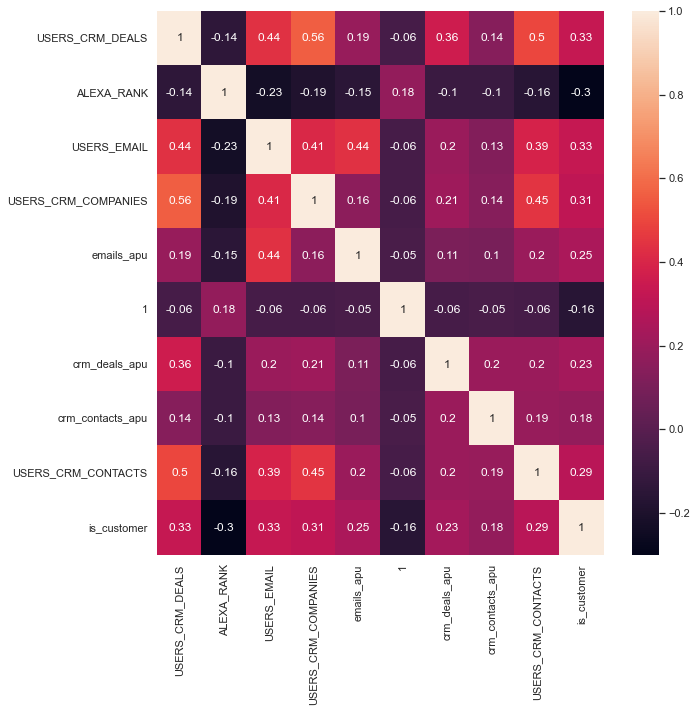

In [613]:
# rerunning correlation analysis with best subset data
fig = plt.figure(figsize = (10,10))
matrix = pd.concat([X,y], axis = 1).corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

In [598]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

In [599]:
# Let's test several different models against accuracy and AUC
import warnings
warnings.filterwarnings("ignore")
#Run through the additional models to find the highest score
models = []
results_train = []
models.append(('Logistic Regression',LogisticRegression(random_state=11, solver='lbfgs', max_iter=1000)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state=11)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(random_state=11)))
models.append(('Random Forest', RandomForestClassifier(random_state=11)))
models.append(('GB Boost', GradientBoostingClassifier(random_state=11)))
models.append(('Ada Boost', AdaBoostClassifier(random_state=11)))
models.append(('SGD', SGDClassifier(random_state=11)))
models.append(('XG', XGBClassifier(random_state=11)))
names = []
scoring = 'accuracy'
for name, model in models:
  kfold = KFold(n_splits=10, random_state=11, shuffle=True)
  model.fit(X_train, y_train)
  scores = cross_val_score(model, X_train, y_train, cv = kfold, scoring=scoring)
  #auc = cross_val_score(model, X_train, y_train, cv = kfold, scoring='roc_auc')

  print(f"Accuracy Score with {name} is: {scores.mean()}")
  print(f"Accuracy STD with {name} is: {scores.std()}")
  #print(f"AUC of {name}: {auc.mean()}")
  #print(f"AUC STD of {name}: {auc.std()}")
  print()

Accuracy Score with Logistic Regression is: 0.6664405849511483
Accuracy STD with Logistic Regression is: 0.007908863667355395

Accuracy Score with KNN is: 0.8881337710950387
Accuracy STD with KNN is: 0.055327291741518736

Accuracy Score with CART is: 0.8856589265321659
Accuracy STD with CART is: 0.0076303801075686675

Accuracy Score with NB is: 0.6831135642684939
Accuracy STD with NB is: 0.005833062487648272

Accuracy Score with SVM is: 0.6788330478365691
Accuracy STD with SVM is: 0.005540108228478276

Accuracy Score with Random Forrest is: 0.8793501141987058
Accuracy STD with Random Forrest is: 0.009217729523130052

Accuracy Score with GB Boost is: 0.8646494099733536
Accuracy STD with GB Boost is: 0.005964320148703818

Accuracy Score with Ada Boost is: 0.8264614262149473
Accuracy STD with Ada Boost is: 0.006897544638889499

Accuracy Score with SGD is: 0.56306220657277
Accuracy STD with SGD is: 0.15423416140908125

Accuracy Score with XG is: 0.9161876348179165
Accuracy STD with XG is: 

In [626]:
#XG Boost performs best on accuracy. 
#However, we should test on other statistics as well

accuracy = XGboost.score(X_train, y_train)

#Calculate precision and recall

probs = pd.DataFrame(XGboost.predict_proba(X_train))
classes = pd.DataFrame(XGboost.predict(X_train))

precision = precision_score(y_train, classes)
recall = recall_score(y_train, classes)
f1 = 2*((precision*recall)/(precision+recall))

In [1086]:
kfold = KFold(n_splits=10, random_state=11, shuffle=True)
XGboost.fit(X_train, y_train)
scores_train = cross_val_score(XGboost, X_train, y_train, cv = kfold, scoring=scoring)
auc_train = cross_val_score(XGboost, X_train, y_train, cv = kfold, scoring='roc_auc')
scores_test = cross_val_score(XGboost, X_test, y_test, cv = kfold, scoring=scoring)
auc_test = cross_val_score(XGboost, X_test, y_test, cv = kfold, scoring='roc_auc')

print(f"Train Accuracy Score with {name} is: {scores_train.mean()}")
print(f"Test Accuracy Score with {name} is: {scores_test.mean()}")
print(f"Train AUC of {name}: {auc_train.mean()}")
print(f"Test AUC of {name}: {auc_test.mean()}")
print()

Train Accuracy Score with XG is: 0.9161876348179165
Test Accuracy Score with XG is: 0.9026281208935611
Train AUC of XG: 0.9490195052204499
Test AUC of XG: 0.932633208866446



The model accuracy is 0.9331418271938718
The model precision is 0.9668704397554723
The model recall is 0.8279297534616683
The model f1 score is 0.8920221959428727
The model AUC is 0.9613908149874445


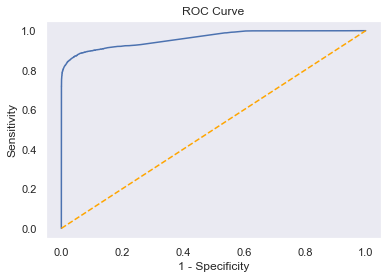

In [610]:
# Test accuracy and AUC are a little higher than train peformance
# but the difference is fairly small, indicating the model is effective
#Draw ROC curve
# XG Boost has great stats across several metrics

fpr_, tpr_, thresholds_ = roc_curve(y_train, probs[1])

fpr = pd.DataFrame(fpr_)
fpr.rename({0: 'fpr'}, axis=1, inplace=True)

tpr = pd.DataFrame(tpr_)
tpr.rename({0: 'tpr'}, axis=1, inplace=True)

thresholds = pd.DataFrame(thresholds_)
thresholds.rename({0: 'thresholds'}, axis=1, inplace=True)

roc_plot = pd.concat([fpr, tpr, thresholds], axis=1)

plt.plot('fpr', 'tpr', data=roc_plot)
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC Curve')

#Compute AUC


#Print results
print('The model accuracy is', accuracy)
print('The model precision is', precision)
print('The model recall is', recall)
print('The model f1 score is', f1)
print('The model AUC is', auc)
# All statistics peform fairly well, except for recall, which measures
# TP/(TP+FN) and suggests a higher number of false negatives.

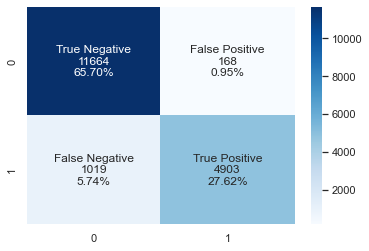

In [1087]:
# Now we set up a pipeline for future use and 
XGboost = Pipeline([
('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
('scaler', StandardScaler()),
('norm', MinMaxScaler()),
('XGB', XGBClassifier())])
XGboost.fit(X_train, y_train)
y_predict = XGboost.predict(X_train)
matrix = confusion_matrix(y_train, y_predict)
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
                matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     matrix.flatten()/np.sum(matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues')
# Our suspicion is confirmed, there are many more false negatives
# than false positives. Given more time, we might investigate why

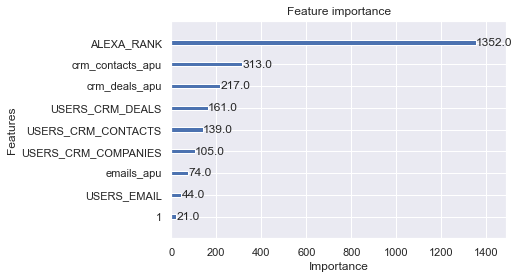

In [635]:
# let's use built-in feature importance function
model = XGBClassifier()
model.fit(X, y)
plot_importance(model)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

## Question 1 conclusion.
Alexa rank is the most important factor to predict customer conversion. Because it is a negative correlation, companies with lower Alexa ranks are more likely to convert. The next highest values are actions per user for contacts and deals. This confirms our suspicion that actions per user is more important than actions. The only company size which shows up is companies with 1 employee. This feature contributes the least, and is negatively correlated, indicating companies with 1 employee are less likely to convert, possibly due to cost or resource manageent.

# Question 2 
Customer Segmentation - What patterns of behavior do customers exhibit? Can these behaviors be used to predict spend?

In [780]:
# First, we will combine datasets from customers and usage_actions to determine actions of customres
# Next, we will reduce dimensionality using PCA
# Then, we will perform hierarchical clustering to perform customer segmentation
# Finally, we will examine what type of customer performs the relevant actions.

In [136]:
#Inner join for dataset of only customers, regardless of conversion date
actions_customer = pd.merge(customers[['id']], 
                        usage_actions, how = 'inner', on = 'id')
#actions_customer['action_date'] = pd.to_datetime(actions_customer['WHEN_TIMESTAMP'], format = '%Y-%m-%d')
actions_customer.drop(['WHEN_TIMESTAMP','id'], axis=1, inplace=True)

In [106]:
print(actions_customer.head())
actions_customer.shape

   ACTIONS_CRM_CONTACTS  ACTIONS_CRM_COMPANIES  ACTIONS_CRM_DEALS  \
0                    44                      0                  0   
1                    89                      0                 10   
2                    47                      0                  0   
3                    95                      0                  0   
4                    80                      1                  7   

   ACTIONS_EMAIL  USERS_CRM_CONTACTS  USERS_CRM_COMPANIES  USERS_CRM_DEALS  \
0             99                  11                    0                0   
1             37                  10                    0                2   
2             66                   6                    0                0   
3             20                  10                    0                0   
4             19                  10                    1                2   

   USERS_EMAIL  
0           13  
1            7  
2           10  
3           11  
4            9  


(8464, 8)

In [107]:
# Add new features for actions per user (apu)
actions_customer['crm_contacts_apu'] = (actions_customer['ACTIONS_CRM_CONTACTS']/actions_customer['USERS_CRM_CONTACTS']).fillna(0).round(2)
actions_customer['crm_companies_apu'] = (actions_customer['ACTIONS_CRM_COMPANIES']/actions_customer['USERS_CRM_COMPANIES']).fillna(0).round(2)
actions_customer['crm_deals_apu'] = (actions_customer['ACTIONS_CRM_DEALS']/actions_customer['USERS_CRM_DEALS']).fillna(0).round(2)
actions_customer['emails_apu'] = (actions_customer['ACTIONS_EMAIL']/actions_customer['USERS_EMAIL']).fillna(0).round(2)
#actions_customer.drop('id', axis=1, inplace=True)
#actions_customer.drop('', axis=1, inplace=True)
actions_customer.head()

,ACTIONS_CRM_CONTACTS,ACTIONS_CRM_COMPANIES,ACTIONS_CRM_DEALS,ACTIONS_EMAIL,USERS_CRM_CONTACTS,USERS_CRM_COMPANIES,USERS_CRM_DEALS,USERS_EMAIL,crm_contacts_apu,crm_companies_apu,crm_deals_apu,emails_apu
0,44,0,0,99,11,0,0,13,4.00,0.0,0.0,7.62
1,89,0,10,37,10,0,2,7,8.90,0.0,5.0,5.29
2,47,0,0,66,6,0,0,10,7.83,0.0,0.0,6.60
3,95,0,0,20,10,0,0,11,9.50,0.0,0.0,1.82
4,80,1,7,19,10,1,2,9,8.00,1.0,3.5,2.11


In [60]:
actions_customer.dtypes

ACTIONS_CRM_CONTACTS       int64
ACTIONS_CRM_COMPANIES      int64
ACTIONS_CRM_DEALS          int64
ACTIONS_EMAIL              int64
USERS_CRM_CONTACTS         int64
USERS_CRM_COMPANIES        int64
USERS_CRM_DEALS            int64
USERS_EMAIL                int64
crm_contacts_apu         float64
crm_companies_apu        float64
crm_deals_apu            float64
emails_apu               float64
dtype: object

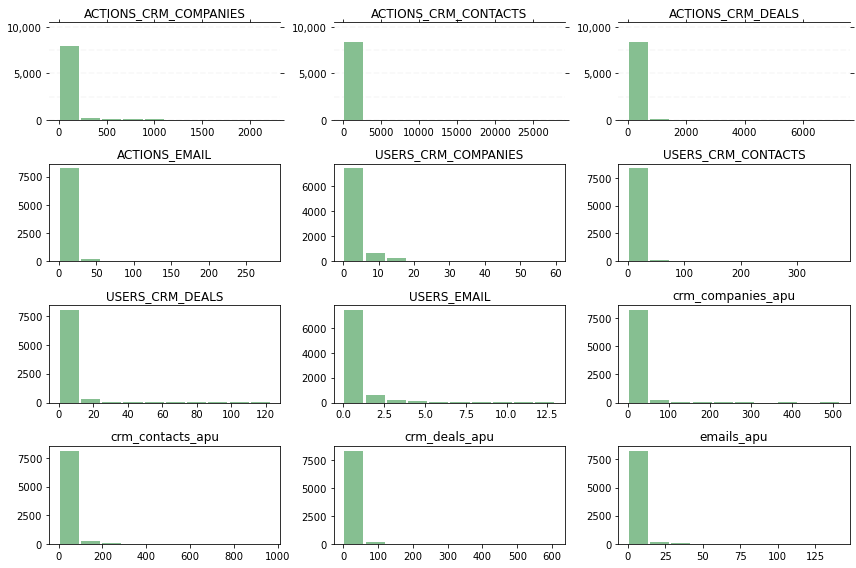

In [61]:
# Check for distribution of data / skew.
ax = actions_customer.hist(grid=False, figsize=(12,8), 
                           color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(True)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    #x.set_title("")

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
    plt.tight_layout()

In [750]:
#Data are highly skewed. We will normalize the data then perform a log transform. Because of 
#the highly skewed nature of the data, this is probably less than desirable, and alternative
#methods could be explored in the future. 
#We will then use PCA to reduce dimensions and Clustering


In [108]:
# We will take the log power to transform the data
actions_customer_transf = actions_customer
actions_customer_transf['ACTIONS_CRM_CONTACTS_transf'] = actions_customer['ACTIONS_CRM_CONTACTS']**(1/10)
actions_customer_transf['ACTIONS_CRM_COMPANIES_transf'] = actions_customer['ACTIONS_CRM_COMPANIES']**(1/10)
actions_customer_transf['ACTIONS_CRM_DEALS_transf'] = actions_customer['ACTIONS_CRM_DEALS']**(1/10)
actions_customer_transf['ACTIONS_EMAIL_transf'] = actions_customer['ACTIONS_EMAIL']**(1/10)
actions_customer_transf['USERS_CRM_CONTACTS_transf'] = actions_customer['USERS_CRM_CONTACTS']**(1/10)
actions_customer_transf['USERS_CRM_COMPANIES_transf'] = actions_customer['USERS_CRM_COMPANIES']**(1/10)
actions_customer_transf['USERS_CRM_DEALS_transf'] = actions_customer['USERS_CRM_DEALS']**(1/10)
actions_customer_transf['USERS_EMAIL_transf'] = actions_customer['USERS_EMAIL']**(1/10)
actions_customer_transf['crm_contacts_apu_transf'] = actions_customer['crm_contacts_apu']**(1/10)
actions_customer_transf['crm_companies_apu_transf'] = actions_customer['crm_companies_apu']**(1/10)
actions_customer_transf['crm_deals_apu_transf'] = actions_customer['crm_deals_apu']**(1/10)
actions_customer_transf['emails_apu_transf'] = actions_customer['emails_apu']**(1/10)
actions_customer_transf.drop(['ACTIONS_CRM_CONTACTS',
                              'ACTIONS_CRM_COMPANIES','ACTIONS_CRM_DEALS',
                              'ACTIONS_EMAIL','USERS_CRM_CONTACTS','USERS_CRM_COMPANIES',
                              'USERS_CRM_DEALS','USERS_EMAIL','crm_contacts_apu',
                              'crm_companies_apu','crm_deals_apu','emails_apu'], axis=1, inplace=True)
actions_customer_transf.head()

,ACTIONS_CRM_CONTACTS_transf,ACTIONS_CRM_COMPANIES_transf,ACTIONS_CRM_DEALS_transf,ACTIONS_EMAIL_transf,USERS_CRM_CONTACTS_transf,USERS_CRM_COMPANIES_transf,USERS_CRM_DEALS_transf,USERS_EMAIL_transf,crm_contacts_apu_transf,crm_companies_apu_transf,crm_deals_apu_transf,emails_apu_transf
0,1.459974,0.0,0.000000,1.583301,1.270982,0.0,0.000000,1.292392,1.148698,0.0,0.000000,1.225168
1,1.566531,0.0,1.258925,1.434895,1.258925,0.0,1.071773,1.214814,1.244340,0.0,1.174619,1.181260
2,1.469636,0.0,0.000000,1.520388,1.196231,0.0,0.000000,1.258925,1.228503,0.0,0.000000,1.207687
3,1.576785,0.0,0.000000,1.349283,1.258925,0.0,0.000000,1.270982,1.252485,0.0,0.000000,1.061713
4,1.549919,1.0,1.214814,1.342380,1.258925,1.0,1.071773,1.245731,1.231144,1.0,1.133462,1.077527


In [109]:
# Next, we will scale the dataset so that it is normalized and on the same scale
#create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
actions_customer_transf = pd.DataFrame(scaler.fit_transform(actions_customer_transf), 
                       columns=actions_customer.columns)

actions_customer_transf.head()

,ACTIONS_CRM_CONTACTS_transf,ACTIONS_CRM_COMPANIES_transf,ACTIONS_CRM_DEALS_transf,ACTIONS_EMAIL_transf,USERS_CRM_CONTACTS_transf,USERS_CRM_COMPANIES_transf,USERS_CRM_DEALS_transf,USERS_EMAIL_transf,crm_contacts_apu_transf,crm_companies_apu_transf,crm_deals_apu_transf,emails_apu_transf
0,0.524480,0.000000,0.000000,0.900295,0.702458,0.000000,0.000000,1.000000,0.577529,0.000000,0.000000,0.746655
1,0.562759,0.000000,0.517417,0.815909,0.695795,0.000000,0.662388,0.939973,0.625614,0.000000,0.618535,0.719896
2,0.527951,0.000000,0.000000,0.864521,0.661144,0.000000,0.000000,0.974105,0.617652,0.000000,0.000000,0.736002
3,0.566443,0.000000,0.000000,0.767228,0.695795,0.000000,0.000000,0.983433,0.629709,0.000000,0.000000,0.647041
4,0.556791,0.462853,0.499287,0.763303,0.695795,0.664026,0.662388,0.963895,0.618980,0.535263,0.596862,0.656678


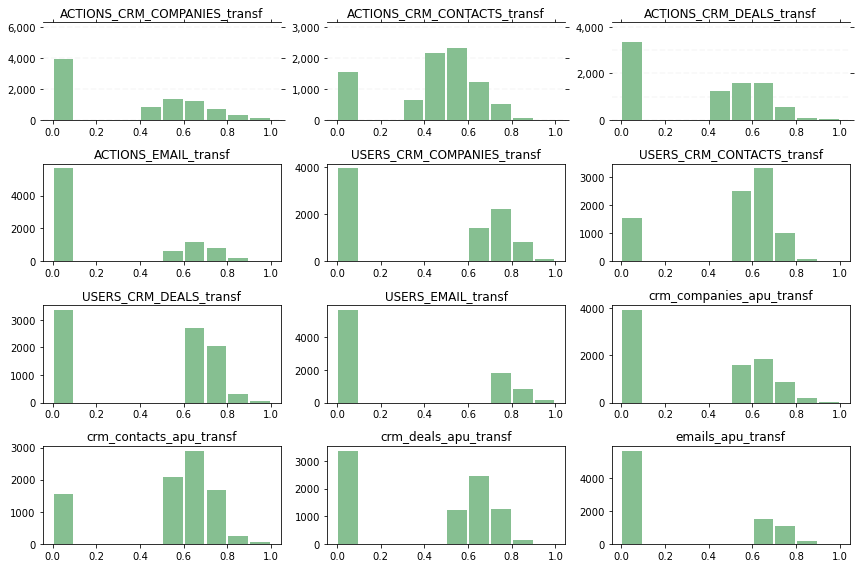

In [65]:
ax = actions_customer_transf.hist(grid=False, figsize=(12,8), 
                           color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(True)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    #x.set_title("")

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
    plt.tight_layout()
#As predicted, there is still some skew, however this is much better!

# Dimensionality Reduction
We currently have a dataset with 12 variables, which is not an extremely high number, but we should still check to see if we can reduce dimensionality, because a simpler model is typically more robust with less bias.

In [110]:
# Here we will use Principal Components Analysis (PCA) to reduce 
#dimensionality. We see that after 4 components, 99% of the variance 
# is explained. We know that PCA is a linear distance algorithm and,
# because the transformed and normalized data sets still have skew,
# we may get reduced accuracy. Given more time, we could attempt to address
# this issue.
pca = PCA(n_components = 4)
pca.fit_transform(actions_customer_transf)
pca.explained_variance_ratio_.cumsum()

array([0.53421964, 0.8037672 , 0.91356897, 0.99068621])

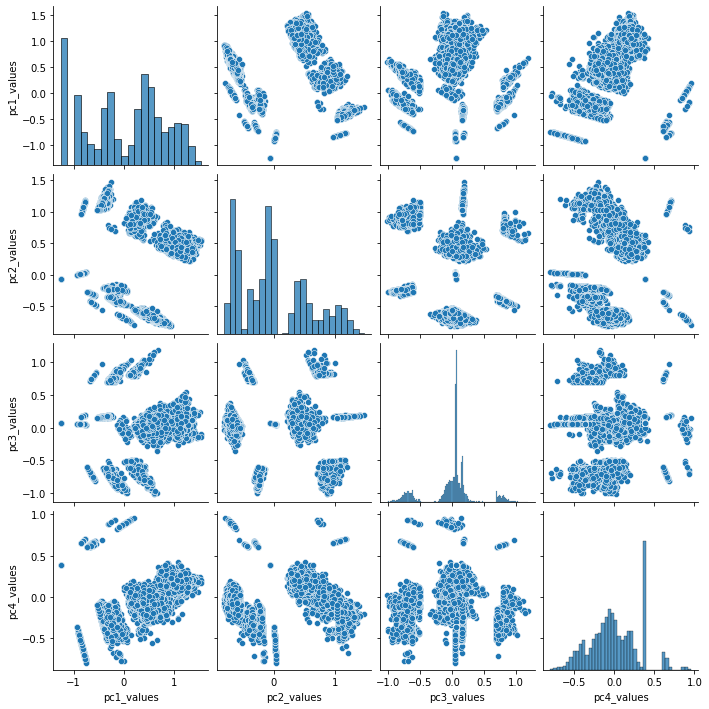

In [67]:
# Let's look at the pairplots of the components to check if we have good
#groupings
pca = PCA(n_components=4)
pcs = pca.fit_transform(actions_customer_transf)

pc1_values = pcs[:,0]
pc2_values = pcs[:,1]
pc3_values = pcs[:,2]
pc4_values = pcs[:,3]

pc = pd.DataFrame({'pc1_values': pc1_values,
                   'pc2_values': pc2_values,
                   'pc3_values': pc3_values,
                   'pc4_values': pc4_values},
                  columns=['pc1_values', 'pc2_values','pc3_values','pc4_values'])

sns.pairplot(pc)
#visualizing primary components

In [111]:
pca_out = PCA().fit(actions_customer_transf)

# get the component variance
# Proportion of Variance (from PC1 to PC4)
pca_out.explained_variance_ratio_

array([5.34219642e-01, 2.69547559e-01, 1.09801769e-01, 7.71172362e-02,
       2.85046932e-03, 1.81428673e-03, 1.44246223e-03, 1.29533670e-03,
       9.47221454e-04, 4.06128503e-04, 3.69529125e-04, 1.88360158e-04])

In [112]:
# component loadings or weights (correlation coefficient between original variables and the component) 
# component loadings represents the elements of the eigenvector

loadings = pca_out.components_
num_pc = pca_out.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, 4+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = actions_customer.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4
variable,,,,
ACTIONS_CRM_CONTACTS_transf,0.220730,0.049800,-0.012851,-0.455019
ACTIONS_CRM_COMPANIES_transf,0.337506,-0.193606,0.355867,0.123807
ACTIONS_CRM_DEALS_transf,0.312130,-0.108771,-0.382189,0.131814
ACTIONS_EMAIL_transf,0.192406,0.483694,0.045898,0.122879
USERS_CRM_CONTACTS_transf,0.230091,0.049922,-0.008296,-0.535100
USERS_CRM_COMPANIES_transf,0.387102,-0.226679,0.416449,0.146837
USERS_CRM_DEALS_transf,0.361841,-0.139318,-0.454228,0.153256
USERS_EMAIL_transf,0.230817,0.572136,0.057137,0.148781
crm_contacts_apu_transf,0.236366,0.037255,-0.006383,-0.586032


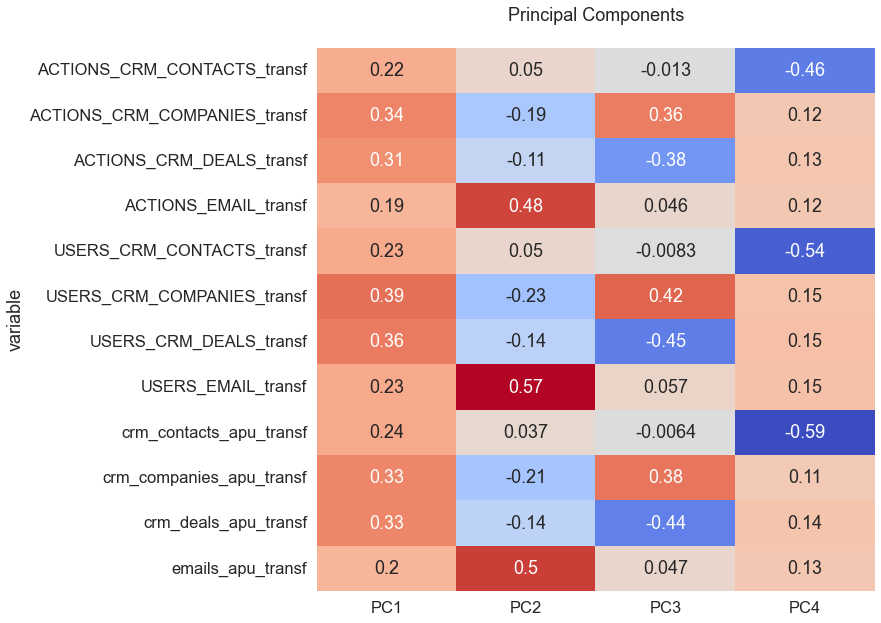

In [170]:
# get correlation matrix plot for loadings
sns.set(font_scale = 1.5)

fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(loadings_df, annot=True, cmap='coolwarm',cbar = False).set(title = 'Principal Components\n')
 
#plt.show()

### PCA interpretation 
PC1 is composed of 'Companies' and 'deals' variables (ACTIONS_CRM_COMPANIES_transf, USERS_CRM_COMPANIES_transf, andcrm_companies_apu_transf), and (ACTIONS_CRM_DEALS_transf, USERS_CRM_DEALS_transf and crm_deals_apu_transf) 

PC2 is composed of 'email variables'
(ACTIONS_EMAIL_transf, USERS_EMAIL_transf, and emails_apu_transf)

PC3 is mainly companies variables

PC4 is composed of contacts variables

We have decided to drop the contacts variables in the final dataset.

In [ ]:
actions_customer_transf.drop(['ACTIONS_CRM_CONTACTS_transf',
                              'USERS_CRM_CONTACTS_transf',
                              'crm_contacts_apu_transf'], axis=1, inplace = True)

### Clustering
Because this is an unsupervised learning problem ('what actions do customers have in common?'), we will use K-Means clustering

In [176]:
kmeans_model = KMeans(init='k-means++', 
                      max_iter=500, 
                      random_state=42)

In [177]:
    
  ''' inputs: K as integer and dataframe
  apply k-means clustering to dataframe
  and make a list of inertia values against 1 to K
  return the inertia values list
  '''
def make_list_of_K(K, dataframe):

    cluster_values = list(range(1, K+1))
    inertia_values=[]
    
    for c in cluster_values:
        model = KMeans(
            n_clusters = c, 
            init='k-means++', 
            max_iter=500, 
            random_state=42)
        model.fit(dataframe)
        inertia_values.append(model.inertia_)
    
    return inertia_values

In [117]:
# Make a list of clusters 
results = make_list_of_K(15, actions_customer_transf.iloc[:,3:])
k_values_distances = pd.DataFrame({"clusters": list(range(1, 16)),
                                   "within cluster sum of squared distances": results})

In [118]:
# visualization for the selection of number of segments
fig = go.Figure()

fig.add_trace(go.Scatter(x=k_values_distances["clusters"], 
                         y=k_values_distances["within cluster sum of squared distances"],
                         mode='lines+markers'))

fig.update_layout(xaxis = dict(
        tickmode = 'linear',
        tick0 = 1,
        dtick = 1),
                  title_text="Within Cluster Sum of Squared Distances VS K Values",
                  xaxis_title="K values",
                  yaxis_title="Cluster sum of squared distances")

fig.show()
#At k=7, the descent stabilizes and continues linearly afterwards, 
#forming an elbow at k=7. This points out the optimal number of actions groups is 7.

In [123]:
# create clustering model with optimal k=7
updated_kmeans_model = KMeans(n_clusters = 7, 
                              init='k-means++', 
                              max_iter=500, 
                              random_state=42)
updated_kmeans_model.fit_predict(actions_customer_transf.iloc[:,4:])

array([3, 6, 3, ..., 5, 1, 0])

In [124]:
# create cluster centers and actual data arrays.
# We then add in the clusters to the dataset
cluster_centers = updated_kmeans_model.cluster_centers_
actual_data = np.expm1(cluster_centers)
add_points = np.append(actual_data, cluster_centers, axis=1)
#actions_customer_transf["clusters"] = updated_kmeans_model.labels_
add_points

array([[ 9.99241404e-01, -1.11022302e-15,  9.08670721e-01,
         9.19260187e-01, -6.10622664e-16,  6.92767811e-01,
        -1.11022302e-15,  6.46407042e-01,  6.51939793e-01,
        -6.10622664e-16],
       [ 4.44089210e-16, -1.05471187e-15, -7.21644966e-16,
        -4.44089210e-16, -5.27355937e-16,  4.44089210e-16,
        -1.05471187e-15, -7.21644966e-16, -4.44089210e-16,
        -5.27355937e-16],
       [ 1.09857722e+00,  1.24139419e+00,  9.26888573e-01,
         9.64735374e-01,  9.87343417e-01,  7.41259601e-01,
         8.07098078e-01,  6.55906564e-01,  6.75357566e-01,
         6.86798781e-01],
       [ 0.00000000e+00,  1.22090191e+00,  1.39745091e-01,
         1.11022302e-16,  1.00492817e+00,  0.00000000e+00,
         7.97913377e-01,  1.30804633e-01,  1.11022302e-16,
         6.95608237e-01],
       [ 3.33066907e-16, -1.11022302e-16,  8.32325080e-01,
        -5.55111512e-17, -2.77555756e-17,  3.33066907e-16,
        -1.11022302e-16,  6.05585696e-01, -5.55111512e-17,
        -2.

In [125]:
# create centers dataframe from add_points
centers_df = pd.DataFrame(data=add_points, columns=['ACTIONS_CRM_COMPANIES_transf',
                                                    'ACTIONS_CRM_DEALS_transf',
                                                    'ACTIONS_EMAIL_transf',
                                                    'USERS_CRM_COMPANIES_transf',
                                                    'USERS_CRM_DEALS_transf',
                                                    'USERS_EMAIL_transf',
                                                    'crm_companies_apu_transf',
                                                    'crm_deals_apu_transf',
                                                    'emails_apu_transf',
                                                    'clusters'])
centers_df.head()

,ACTIONS_CRM_COMPANIES_transf,ACTIONS_CRM_DEALS_transf,ACTIONS_EMAIL_transf,USERS_CRM_COMPANIES_transf,USERS_CRM_DEALS_transf,USERS_EMAIL_transf,crm_companies_apu_transf,crm_deals_apu_transf,emails_apu_transf,clusters
0,9.992414e-01,-1.110223e-15,9.086707e-01,9.192602e-01,-6.106227e-16,6.927678e-01,-1.110223e-15,6.464070e-01,6.519398e-01,-6.106227e-16
1,4.440892e-16,-1.054712e-15,-7.216450e-16,-4.440892e-16,-5.273559e-16,4.440892e-16,-1.054712e-15,-7.216450e-16,-4.440892e-16,-5.273559e-16
2,1.098577e+00,1.241394e+00,9.268886e-01,9.647354e-01,9.873434e-01,7.412596e-01,8.070981e-01,6.559066e-01,6.753576e-01,6.867988e-01
3,0.000000e+00,1.220902e+00,1.397451e-01,1.110223e-16,1.004928e+00,0.000000e+00,7.979134e-01,1.308046e-01,1.110223e-16,6.956082e-01
4,3.330669e-16,-1.110223e-16,8.323251e-01,-5.551115e-17,-2.775558e-17,3.330669e-16,-1.110223e-16,6.055857e-01,-5.551115e-17,-2.775558e-17


In [126]:
centers_df['clusters'] = centers_df['clusters'].astype('int')

In [127]:
# differentiate between data points and cluster centers
actions_customer_transf["is_center"] = 0
centers_df["is_center"] = 1

# add dataframes together
actions_customer_transf = actions_customer_transf.append(centers_df, ignore_index=True)
actions_customer_transf.tail()

,ACTIONS_CRM_COMPANIES_transf,ACTIONS_CRM_DEALS_transf,ACTIONS_EMAIL_transf,USERS_CRM_COMPANIES_transf,USERS_CRM_DEALS_transf,USERS_EMAIL_transf,crm_companies_apu_transf,crm_deals_apu_transf,emails_apu_transf,is_center,clusters
8466,1.098577e+00,1.241394e+00,9.268886e-01,9.647354e-01,9.873434e-01,7.412596e-01,8.070981e-01,6.559066e-01,6.753576e-01,1,0.0
8467,0.000000e+00,1.220902e+00,1.397451e-01,1.110223e-16,1.004928e+00,0.000000e+00,7.979134e-01,1.308046e-01,1.110223e-16,1,0.0
8468,3.330669e-16,-1.110223e-16,8.323251e-01,-5.551115e-17,-2.775558e-17,3.330669e-16,-1.110223e-16,6.055857e-01,-5.551115e-17,1,0.0
8469,9.222621e-01,-3.330669e-16,-3.330669e-16,8.619593e-01,-5.551115e-17,6.535027e-01,-3.330669e-16,-3.330669e-16,6.216293e-01,1,0.0
8470,1.016977e+00,1.221510e+00,-2.220446e-16,9.293915e-01,1.008257e+00,7.015998e-01,7.981870e-01,-2.220446e-16,6.572047e-01,1,0.0


In [128]:
# add clusters to the dataframe
actions_customer_transf["cluster_name"] = actions_customer_transf["clusters"].astype(str)

In [979]:
# visualize log_transformation customer segments with a 3D plot
# We arbitrarily chose users instead of actions or apu
# This is only for visualization and to show where customers are clustered
fig = px.scatter_3d(actions_customer_transf,
                    x="USERS_CRM_DEALS_transf",
                    y="USERS_EMAIL_transf",
                    z="USERS_CRM_COMPANIES_transf",
                    color='cluster_name',
                    hover_data=["USERS_CRM_DEALS_transf",
                                "USERS_EMAIL_transf",
                                "USERS_CRM_COMPANIES_transf"],
                    category_orders = {"cluster_name": 
                                       ["0", "1", "2", "3","4","5","6"]},
                    symbol = "is_center"
                    )

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [181]:
# values for log_transformation
cardinality_df = pd.DataFrame(
    actions_customer_transf.cluster_name.value_counts().reset_index())

cardinality_df.rename(columns={"index": "Customer Groups",
                               "cluster_name": "Customer Group Magnitude"},
                      inplace=True)

In [984]:
# This df shows how many customers are in each cluster
cardinality_df
#Cluster group 1 has the most members, followed by 4 and 2
# The other 4 clusters make up about 50% of members

,Customer Groups,Customer Group Magnitude
0,1,2322
1,4,2067
2,2,1536
3,3,802
4,5,789
5,6,507
6,0,462


In [983]:
fig = px.bar(cardinality_df, x="Customer Groups", 
             y="Customer Group Magnitude",
             color = "Customer Groups",
             category_orders = {"Customer Groups": ["0", "1", "2", "3","4"
                                                    ,"5","6"]})

fig.update_layout(xaxis = dict(
        tickmode = 'linear',
        tick0 = 1,
        dtick = 1),
                 yaxis = dict(
        tickmode = 'linear',
        tick0 = 1000,
        dtick = 1000))

fig.show()

## Predict Spend

In [1008]:
# Add the cluster name to the original actions_customer dataset
# Merge with customers to add back in MRR field
actions_customer['cluster_name'] = actions_customer_transf['cluster_name']
actions_clusters = pd.merge(actions_customer, customers, how = 'inner', on = 'id')

In [1010]:
actions_clusters.head()

,id,ACTIONS_CRM_CONTACTS,ACTIONS_CRM_COMPANIES,ACTIONS_CRM_DEALS,ACTIONS_EMAIL,USERS_CRM_CONTACTS,USERS_CRM_COMPANIES,USERS_CRM_DEALS,USERS_EMAIL,crm_contacts_apu,crm_companies_apu,crm_deals_apu,emails_apu,cluster_name,CLOSEDATE,MRR,ALEXA_RANK,EMPLOYEE_RANGE,INDUSTRY
0,199,44,0,0,99,11,0,0,13,4.00,0.0,0.0,7.62,3,2019-06-20,290.0,309343,201 to 1000,Other
1,199,89,0,10,37,10,0,2,7,8.90,0.0,5.0,5.29,0,2019-06-20,290.0,309343,201 to 1000,Other
2,199,47,0,0,66,6,0,0,10,7.83,0.0,0.0,6.60,3,2019-06-20,290.0,309343,201 to 1000,Other
3,199,95,0,0,20,10,0,0,11,9.50,0.0,0.0,1.82,3,2019-06-20,290.0,309343,201 to 1000,Other
4,199,80,1,7,19,10,1,2,9,8.00,1.0,3.5,2.11,2,2019-06-20,290.0,309343,201 to 1000,Other


In [1029]:
actions_clusters.groupby(['cluster_name'])['MRR'].mean().sort_values(ascending = False)

cluster_name
3    406.782466
1    353.561255
2    337.663183
6    315.358452
5    302.969109
4    293.011817
0    256.055272
Name: MRR, dtype: float64

In [1133]:
#We see a clear difference in customer spend among the clusters
MRR_df = actions_clusters.groupby(['cluster_name'])['MRR'].mean().sort_values(ascending = False)
MRR_df = MRR_df.reset_index()
MRR_df
# Customers in the 3rd cluster spend almost 60% more than the lowest cluster

,cluster_name,MRR
0,3,406.782466
1,1,353.561255
2,2,337.663183
3,6,315.358452
4,5,302.969109
5,4,293.011817
6,0,256.055272


In [1060]:
fig = px.bar(MRR_df, x="cluster_name", 
             y="MRR",
             color = "cluster_name")
             #category_orders = {"cluster_name": ["0", "1", "2", "3","4"
             #                                       ,"5","6"]})

fig.update_layout(xaxis = dict(
        tickmode = 'linear',
        tick0 = 1,
        dtick = 1),
                 yaxis = dict(
        tickmode = 'linear',
        tick0 = 1000,
        dtick = 1000))



fig.show()
# This bar chart visualizes customer spend data of clusters

## Question 3 
Customer Acquisition - What is the best strategy to acquire customers? 

In [1028]:
#What actions do these groups perform?
actions_clusters.groupby(['cluster_name'])[['ACTIONS_CRM_COMPANIES',
                                                    'ACTIONS_CRM_DEALS',
                                                    'ACTIONS_EMAIL',
                                                    'USERS_CRM_COMPANIES',
                                                    'USERS_CRM_DEALS',
                                                    'USERS_EMAIL',
                                                    'crm_companies_apu',
                                                    'crm_deals_apu',
                                                    'emails_apu',
                                            'MRR']].mean().round(2).sort_values(by = 'MRR',ascending = False)

,ACTIONS_CRM_COMPANIES,ACTIONS_CRM_DEALS,ACTIONS_EMAIL,USERS_CRM_COMPANIES,USERS_CRM_DEALS,USERS_EMAIL,crm_companies_apu,crm_deals_apu,emails_apu,MRR
cluster_name,,,,,,,,,,
3,3.17,0.00,10.73,0.34,0.00,1.65,1.00,0.00,6.32,406.78
1,69.18,64.93,0.00,3.52,4.14,0.00,14.41,14.78,0.00,353.56
2,142.37,225.21,9.85,8.02,8.97,1.83,14.02,19.27,5.02,337.66
6,17.99,0.00,0.03,1.49,0.00,0.02,8.81,0.00,0.02,315.36
5,0.00,32.88,0.00,0.00,2.23,0.00,0.00,9.51,0.00,302.97
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,293.01
0,0.00,238.57,9.94,0.00,8.68,1.56,0.00,17.04,6.33,256.06


## Analysis
We see clear patterns of behavior emerge among clusters

Cluster 3 - The highest MRR group is also fairly small, with 1/3 the members of the largest group. This group is the emails group. Highest number of email actions and email actions per user, and nearly the highest average email users. This is also one of the smaller groups.

Cluster 1 - The second highest MRR is also the largest group. This is the second most active overall, with highest activity in company actions per user. This is also the largest group

Cluster 2 - The third highest MRR and the third largest group. This is the most active group overall. They are especially active in companies and deals.

The overall strategy should be to move groups in the remaining clusters into these groups. We have seen emails, companies and deals as strong indicators of high value and activity. 

We've also seen, here and in the previous analysis that companies who perform high numbers of actions per user and who have a high number of users are especially likely both to convert to customers and to have high spend. 

## Customer Acquisition Strategy

Analysis showed companies with low alexa ranks who perform high actions per user are more likely to convert. Alexa rank is a measure of website popularity. In business terms, these companies are the go-getters - companies that are actively monitoring their web presence and using Hubspot as their CRM.

Customer acquistion should then be focused on companies with these behaviors.

Analysis of customer actions shows clustering along certain behaviors with the highest customer spend corresponding to certain actions within clusters. 

Non-customers can be grouped into these clusters according to their behavior. 

In terms of a customer acquistion strategy, we should measure the difference in cost and success rate for each cluster.

In [1077]:
#We define two new columns:
# 1. auto_reach - refers to an automated outreach via email. 
#This strategy costs $5 and has a 15% likelihood to convert.
#2. hs_reach - refers to an outreach by a hubspot rep
#This strategy costs $100 and has a 50% likelihood to convert.
MRR_df['MRR'] = MRR_df['MRR'].round(2)
MRR_df['auto_reach'] = (MRR_df['MRR']*.15 - 5).round(2)
MRR_df['hs_reach'] = (MRR_df['MRR']*.5 -100).round(2)
MRR_df

,cluster_name,MRR,auto_reach,hs_reach
0,3,406.78,56.02,103.39
1,1,353.56,48.03,76.78
2,2,337.66,45.65,68.83
3,6,315.36,42.30,57.68
4,5,302.97,40.45,51.49
5,4,293.01,38.95,46.50
6,0,256.06,33.41,28.03


In [1085]:
#define conditions
conditions = [MRR_df['auto_reach'] > MRR_df['hs_reach'], 
              MRR_df['auto_reach'] < MRR_df['hs_reach']]

#define choices
choices = ['auto_reach', 'hs_reach']

#create new column in DataFrame that displays results of comparisons
MRR_df['compare'] = np.select(conditions, choices, default='Tie')
MRR_df
#As we can see below, an outreach by a Hubspot representative, though more
#expensive, provides a greater return for all clusters except cluster 6.

,cluster_name,MRR,auto_reach,hs_reach,compare
0,3,406.78,56.02,103.39,hs_reach
1,1,353.56,48.03,76.78,hs_reach
2,2,337.66,45.65,68.83,hs_reach
3,6,315.36,42.30,57.68,hs_reach
4,5,302.97,40.45,51.49,hs_reach
5,4,293.01,38.95,46.50,hs_reach
6,0,256.06,33.41,28.03,auto_reach
